# Ecological Marine Units

Downloaded "EMU netCDF" file from https://esri.maps.arcgis.com/home/group.html?id=6c78a5125d3244f38d1bc732ef0ee743#overview

In [1]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
fp = 'data/emu_v5_20200914.nc'
nc = netCDF4.Dataset(fp)

In [3]:
lat = nc.variables["latitude"][:]
lon = nc.variables["longitude"][:]
depth = nc.variables["depth"][:]

temp = nc.variables["temp"][:]
salinity = nc.variables["salinity"][:]
appO2ut = nc.variables["appO2ut"][:]
dissO2 = nc.variables["dissO2"][:]
nitrate = nc.variables["nitrate"][:]
percO2sat = nc.variables["percO2sat"][:]
phosphate = nc.variables["phosphate"][:]
silicate = nc.variables["silicate"][:]
srtm30 = nc.variables["srtm30"][:]

emu = nc.variables["name_emu"][:]

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
def plot_emus_over_depth(depth_level):
    plt.contourf(emu[depth_level,:,:])
    plt.colorbar()

depth_levels = np.array((range(len(depth))))
interact(plot_emus_over_depth, depth_level=widgets.IntSlider(value=depth_levels.max(), min=depth_levels.min(), max=depth_levels.max(), step=1))
plt.show()

interactive(children=(IntSlider(value=101, description='depth_level', max=101), Output()), _dom_classes=('widg…

/tmp/ipykernel_28440/3805196074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_surface["closest_lat"] = my_surface.apply(lambda x: np.argmin(abs(lat-x.LATITUDE)), axis=1)
/tmp/ipykernel_28440/3805196074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_surface["closest_lon"] = my_surface.apply(lambda x: np.argmin(abs(lon-x.LONGITUDE)), axis=1)
/tmp/ipykernel_28440/3805196074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

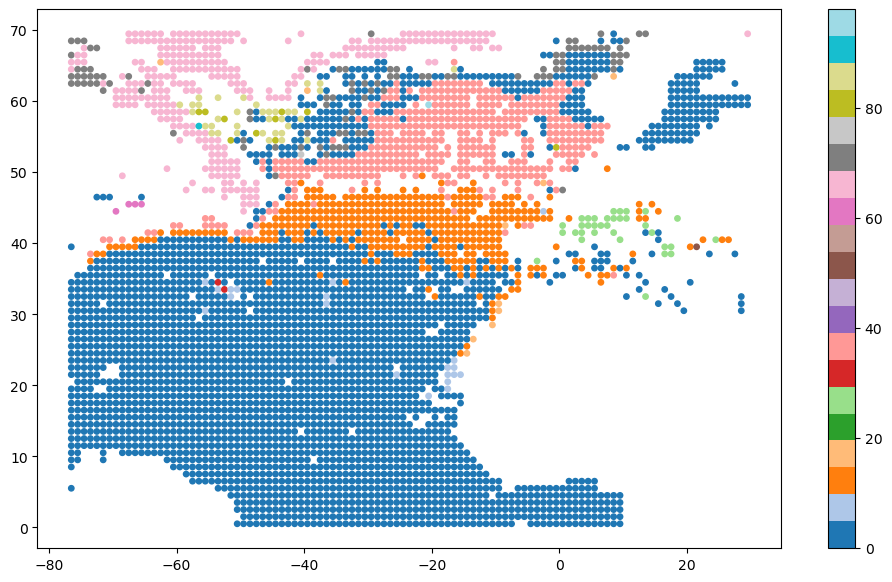

In [5]:
import pandas as pd
my = pd.read_csv("output_old/dbscan/uncertainty/umap_dbscan_kneedrop_5.csv")#.drop("Unnamed: 0", axis=1)
my_surface = my[my.LEV_M == 0 ]

my_surface["closest_lat"] = my_surface.apply(lambda x: np.argmin(abs(lat-x.LATITUDE)), axis=1)
my_surface["closest_lon"] = my_surface.apply(lambda x: np.argmin(abs(lon-x.LONGITUDE)), axis=1)

my_surface["label_new"] = my_surface.label.copy()
my_surface.label_new = my_surface.label_new.apply(lambda x: x if x != -1 else np.nan)#, axis=0)

plt.rcParams[("figure.figsize")] = (12, 7)
plt.scatter(my_surface.LONGITUDE, my_surface.LATITUDE, c=my_surface.label_new, s=15, cmap="tab20")
plt.colorbar()
plt.show()

In [6]:
y = np.sort(my_surface.closest_lat.unique())
x = np.sort(my_surface.closest_lon.unique())
res = pd.DataFrame(columns=x, index=y)

for i in x:
    for j in y:
        temp = my_surface[(my_surface.closest_lon == i) & (my_surface.closest_lat == j)]
        if not temp.empty:
            if temp.label.values[0] == -1:
                res.loc[j, i] = np.nan
            else:
                res.loc[j, i] = float(temp.label.values[0])
    
res = res.astype(float)

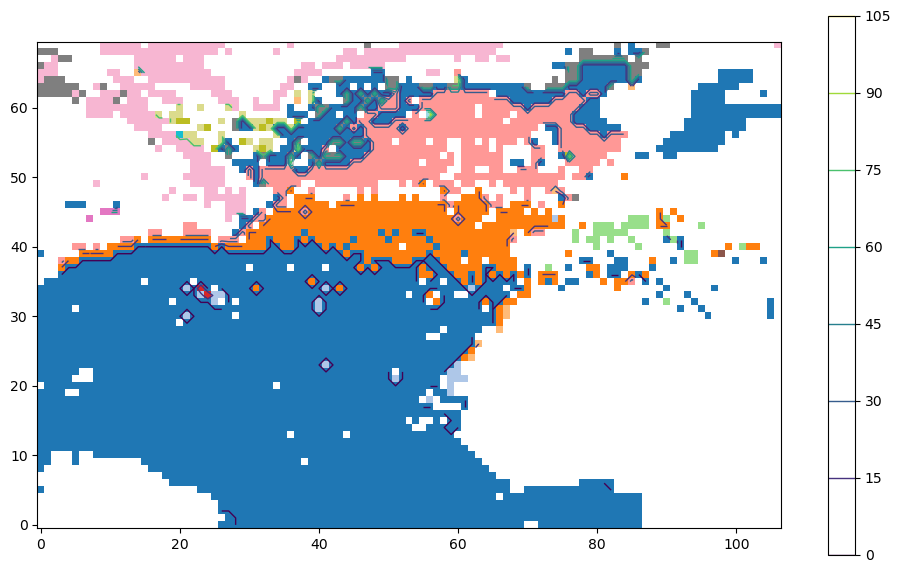

In [7]:
plt.rcParams[("figure.figsize")] = (12, 7)

plt.imshow(res, cmap="tab20")
plt.gca().invert_yaxis()
plt.contour(res, linewidths=1)#, colors="white")#, levels=5)#, levels=1000)
plt.colorbar()
plt.show()

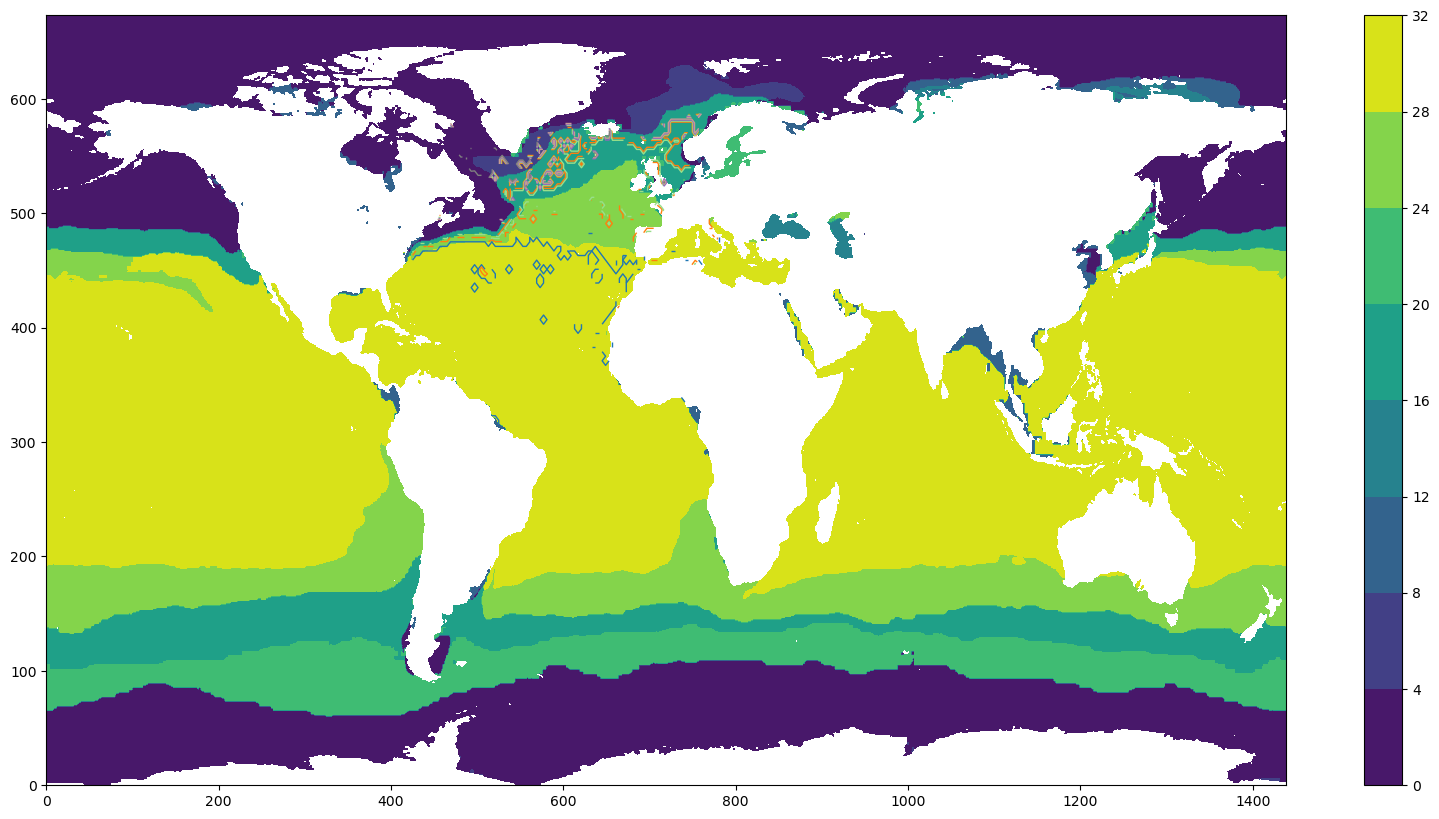

In [8]:
plt.rcParams[("figure.figsize")] = (20, 10)

plt.contourf(emu[-1,:,:])
plt.colorbar()
# plt.scatter(x=my_surface.closest_lon, y=my_surface.closest_lat, c=my_surface.label, s=1, cmap="tab20", alpha=0.4)
# plt.imshow(res)
# plt.gca().invert_yaxis()
plt.contour(x, y, res, linewidths=1, cmap="tab20")#, colors="white")#, levels=5)#, levels=1000)
# plt.colorbar()
plt.show()